# Analysis of Resource Ratios

In [2]:
from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [3]:
results_filename = "../data/resource_ratio_fog v2__40_8_07-08_03-09-58.json"

with open(results_filename) as file:
    results_data = json.load(file)

## Resource Ratio results

In [42]:
greedy_name = 'Greedy Utility * deadline / Sum, Product, Pow percent sum'
algorithms = [greedy_name, 'Optimal', 'Fixed Optimal']
ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

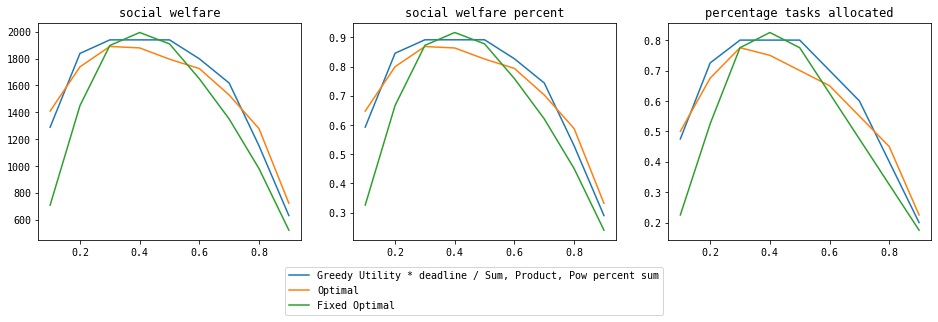

In [38]:
system_fig, (sw_ax, swp_ax, pta_ax) = plt.subplots(1, 3, figsize=(16, 4))
for ax, prop in [(sw_ax, 'social welfare'), (swp_ax, 'social welfare percent'), (pta_ax, 'percentage tasks allocated')]:
    for algo in algorithms:
        results = [results_data[0][f'ratio {ratio}'][algo][prop] for ratio in ratios]
        ax.plot(ratios, results, label=algo)
    ax.set_title(prop)
        
plt.legend(bbox_to_anchor=(0, -0.1))

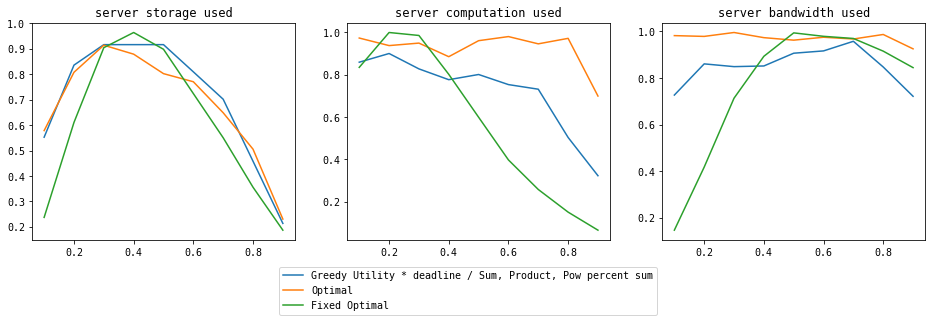

In [36]:
server_fig, (ax_storage_used, ax_computation_used, ax_bandwidth_used) = plt.subplots(1, 3, figsize=(16, 4))
for ax, prop in [(ax_storage_used, 'server storage used'), (ax_computation_used, 'server computation used'), 
                 (ax_bandwidth_used, 'server bandwidth used')]:
    for algo in algorithms:
        results = [np.mean(list(results_data[0][f'ratio {ratio}'][algo][prop].values())) for ratio in ratios]
        ax.plot(ratios, results, label=algo)
    ax.set_title(prop)
        
plt.legend(bbox_to_anchor=(0, -0.1))

## Resource ratio social welfare percentage average

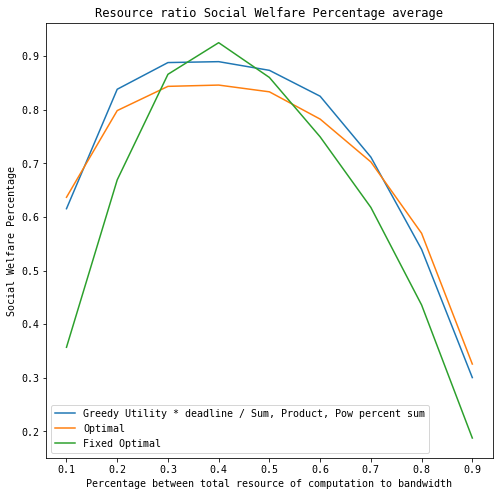

In [57]:
avg_fig, swp_avg_ax = plt.subplots(figsize=(8, 8))
swp_avg_ax.set_ylabel('Social Welfare Percentage')
swp_avg_ax.set_xlabel('Percentage between total resource of computation to bandwidth')
for algo in algorithms:
    swp_avg_ax.plot(ratios, [np.mean([result[f'ratio {ratio}'][algo]['social welfare percent'] 
                                      for result in results_data]) for ratio in ratios], label=algo)
swp_avg_ax.set_title('Resource ratio Social Welfare Percentage average')
plt.legend()

## Resource ratio social welfare difference

Text(0.5, 1.0, 'Difference between Greedy and Fixed Optimal in Social welfare')

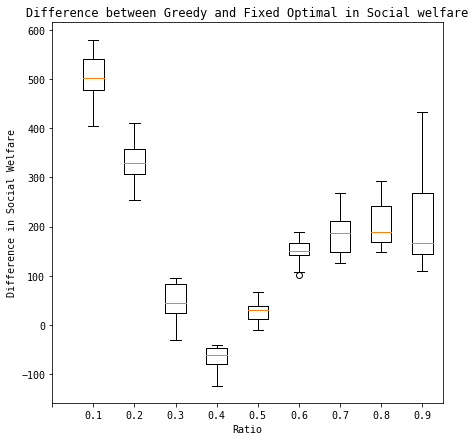

In [56]:
diff_fig, diff_ax = plt.subplots(figsize=(7, 7))

differences = [
    [result[f'ratio {ratio}'][greedy_name]['social welfare'] - result[f'ratio {ratio}']['Fixed Optimal']['social welfare']
     for result in results_data]
    for ratio in ratios
]

diff_ax.boxplot(differences)
diff_ax.set_ylabel('Difference in Social Welfare')
plt.xticks(ticks=np.arange(len(ratios)+1), labels=[''] + ratios)
diff_ax.set_xlabel('Ratio')
diff_ax.set_title('Difference between Greedy and Fixed Optimal in Social welfare')